# GA DSI Capstone Project - Malware Classification
by: Kwek Jun Hong (GA SG DSI 26)
***
# Introduction
***
Malware is intrusive software that is designed to damage and destroy computers and computer systems. The main purpose of malware is to gain personal or restricted information or to damage the device for financial gains. Delivery methods for malware can differ significantly and can involve a combination of different delivery methods like phishing or social engineering. Some common example of malware includes viruses, worms, Trojan viruses, spyware, adware, and ransomware [(source)](https://www.cisco.com/c/en/us/products/security/advanced-malware-protection/what-is-malware.html). The malware industry continues to be a well-organized, well-funded market dedicated to evading traditional security measures and this problem topic was taken from [(Kaggle Competition)](https://www.kaggle.com/c/microsoft-malware-prediction/). 

According to research done by [Cybercrime Magazine](https://cybersecurityventures.com/cybercrime-damages-6-trillion-by-2021/#:~:text=The%20latest%20forecast%20is%20for,every%2040%20seconds%20in%202016.), it is estimated that cybercrime will be costing the world up to USD 10.5 trillion annually by 2025. This figure has increased significantly from USD3 trillion  in 2015. The transition to remote working conditions during the pandemic have also further increase the rate of attacks to users and employees of businesses. 

The biggest threat of malware would be Ransomware where it is a type of malware that denies administrators and users access to their system or files. Often, the attackers would request for ransom payment in the form of Bitcoin or other cyprtocurrency to free up the system. Some major malware attack in 2021 would be the [Colonial Pipeline ransomware attack](https://www.cnbc.com/2021/06/08/colonial-pipeline-ceo-testifies-on-first-hours-of-ransomware-attack.html) where the company paid USD 5 million after hackers crippled its IT network, disrupting fuel deliveries in USA and [CNA Financial Corp.](https://www.bloomberg.com/news/articles/2021-05-20/cna-financial-paid-40-million-in-ransom-after-march-cyberattack#:~:text=CNA%20Financial%20Corp.%2C%20among%20the,with%20knowledge%20of%20the%20attack.), one of the largest insurance companies in the USA, paid USD 40 million to regain control of its network after a ransomware attack.


# Problem Statement
***
For this project, the perspective would be that I am an data analyst in an PC operating system company tasked to look at the trend of malware attacks and the factors that would be influencing this trend. 

The problem statement would be to develop a model that is able to predict if a machine has being infected by malware based on the different properties of that machine and to identify which features are important to malware prediction and propose recommendations accordingly. 

# Notebook organisation:

- **Notebook 1 - Data Cleaning, Feature Selection, EDA and Data Visualization (current notebook)**
- Notebook 2 - Model Data Preparation and Modeling

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 100)

# Import Data

As the dataset is huge, in order to reduce the memory used, there is a need to define the data types of each of the features before importing the dataset. 

In [2]:
# list of dtypes of the features

dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

In [3]:
train = pd.read_csv('../data/train.csv', dtype = dtypes)
train.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_ProcessorClass,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,29,128035.0,18.0,35.0,-85,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Desktop,Windows.Desktop,2668.0,9124.0,4.0,5.0,2340.0,NaN,476940.0,HDD,299451.0,0,4096.0,Desktop,18.906250,1440.0,900.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.0,119,UNKNOWN,0,IS_GENUINE,Retail,NaN,0.0,Retail,NaN,628.0,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,93,1482.0,18.0,119.0,64,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Notebook,Windows.Desktop,2668.0,91656.0,4.0,5.0,2404.0,NaN,476940.0,HDD,102385.0,0,4096.0,Notebook,13.898438,1366.0,768.0,Mobile,NaN,1.000000e+00,10.0.17134.1,amd64,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,8.0,31,UNKNOWN,0,OFFLINE,Retail,NaN,0.0,NOT_SET,NaN,628.0,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,86,153579.0,18.0,64.0,49,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,NaN,0.0,137.0,RequireAdmin,1.0,1.0,Desktop,Windows.Desktop,4908.0,317701.0,4.0,5.0,1972.0,NaN,114473.0,SSD,113907.0,0,4096.0,Desktop,21.500000,1920.0,1080.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Core,CORE,UUPUpgrade,7.0,30,FullAuto,0,IS_GENUINE,OEM:NONSLP,NaN,0.0,Retail,NaN,142.0,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,88,20710.0,NaN,117.0,115,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,ExistsNotSet,1.0,1.0,Desktop,Windows.Desktop,1443.0,275890.0,4.0,5.0,2272.0,NaN,238475.0,UNKNOWN,227116.0,0,4096.0,MiniTower,18.500000,1366.0,768.0,Desktop,NaN,4.294967e+09,10.0.17134.228,amd64,rs4_release,17134,228,P

In [4]:
test = pd.read_csv('../data/test.csv', dtype = dtypes)
test.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_ProcessorClass,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier
0,0000010489e3af074adeac69c53e555e,win8defender,1.1.15400.5,4.18.1810.5,1.281.501.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,43,58552.0,18.0,53.0,42,windows10,x64,10.0.0.0,15063,768,rs2,15063.0.amd64fre.rs2_release.170317-1834,Home,1.0,0,NaN,NaN,108.0,NaN,1.0,1.0,Notebook,Windows.Desktop,2688.0,30661.0,4.0,5.0,3064.0,NaN,488386.0,SSD,123179.0,0,8192.0,Notebook,15.500000,1920.0,1080.0,Mobile,NaN,8.0,10.0.15063.1387,amd64,rs2_release,15063,1387,Core,CORE,Reset,37.0,158,AutoInstallAndRebootAtMaintenanceTime,0,IS_GENUINE,OEM:DM,NaN,0.0,Retail,NaN,807.0,8554.0,1,NaN,0.0,0,0,0.0,0.0,7.0
1,00000176ac758d54827acd545b6315a5,win8defender,1.1.15400.4,4.18.1809.2,1.279.301.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,68,71395.0,NaN,276.0,74,windows10,x64,10.0.0.0,16299,768,rs3,16299.431.amd64fre.rs3_release_svc_escrow.1805...,Home,1.0,0,NaN,NaN,117.0,RequireAdmin,1.0,1.0,Notebook,Windows.Desktop,2206.0,242491.0,4.0,5.0,3410.0,NaN,1907729.0,HDD,1882352.0,0,8192.0,Notebook,15.500000,1366.0,768.0,Mobile,NaN,0.0,10.0.16299.611,amd64,rs3_release_svc_escrow,16299,611,Core,CORE,UUPUpgrade,7.0,30,AutoInstallAndRebootAtMaintenanceTime,0,IS_GENUINE,Retail,NaN,0.0,Retail,NaN,554.0,33105.0,1,NaN,0.0,0,0,0.0,1.0,12.0
2,0000019dcefc128c2d4387c1273dae1d,win8defender,1.1.15300.6,4.18.1809.2,1.277.230.0,0,7.0,0,NaN,49480.0,2.0,1.0,1,201,66202.0,NaN,267.0,-5,windows10,x64,10.0.0.0,14393,768,rs1,14393.2189.amd64fre.rs1_release.180329-1711,Home,1.0,0,NaN,NaN,98.0,RequireAdmin,1.0,1.0,Notebook,Windows.Desktop,585.0,189533.0,2.0,5.0,2096.0,NaN,29820.0,SSD,28678.0,0,4096.0,Notebook,13.898438,1280.0,720.0,Mobile,NaN,0.0,10.0.14393.2189,amd64,rs1_release,14393,2189,CoreSingleLanguage,CORE_SINGLELANGUAGE,Other,35.0,148,UNKNOWN,0,IS_GENUINE,OEM:DM,NaN,0.0,Retail,NaN,556.0,63396.0,1,NaN,0.0,0,0,0.0,1.0,11.0
3,0000055553dc51b1295785415f1a224d,win8defender,1.1.15400.5,4.18.1810.5,1.281.664.0,0,7.0,0,NaN,42160.0,2.0,1.0,1,29,120917.0,NaN,35.0,-85,windows10,x64,10.0.0.0,16299,768,rs3,16299.15.amd64fre.rs3_release.170928-1534,Home,1.0,0,NaN,NaN,117.0,RequireAdmin,1.0,1.0,Notebook,Windows.Desktop,2668.0,171228.0,2.0,5.0,1985.0,NaN,476940.0,HDD,439345.0,0,4096.0,Notebook,14.000000,1366.0,768.0,Mobile,li-i,0.0,10.0.16299.371,amd64,rs3_re

# First look at the data
***

## `train` datasets

The train dataset consist of 8.9 million rows with 83 features, including 1 dependent variable `HasDetections` where it indicates the presence of malware on the machine.

Looking at the dependent variable, it can be seen that the data provided in the Kaggle Competition is balanced between the two classes.

In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
IsBeta,8921483.0,7.509962e-06,2.740421e-03,0.000000,0.000000,0.0,0.000000e+00,1.000000e+00
RtpStateBitfield,8889165.0,NaN,0.000000e+00,0.000000,7.000000,7.0,7.000000e+00,3.500000e+01
IsSxsPassiveMode,8921483.0,1.733378e-02,1.305118e-01,0.000000,0.000000,0.0,0.000000e+00,1.000000e+00
DefaultBrowsersIdentifier,433438.0,NaN,NaN,1.000000,788.000000,1632.0,2.372000e+03,3.212000e+03
AVProductStatesIdentifier,8885262.0,4.948320e+04,1.379994e+04,3.000000,49480.000000,53447.0,5.344700e+04,7.050700e+04
AVProductsInstalled,8885262.0,NaN,0.000000e+00,0.000000,1.000000,1.0,2.000000e+00,7.000000e+00
AVProductsEnabled,8885262.0,NaN,0.000000e+00,0.000000,1.000000,1.0,1.000000e+00,5.000000e+00
HasTpm,8921483.0,9.879711e-01,1.090149e-01,0.000000,1.000000,1.0,1.000000e+00,1.000000e+00
CountryIdentifier,8921483.0,1.080490e+02,6.304706e+01,1.000000,51.000000,97.0,1.620000e+02,2.220000e+02
CityIdentifier,8596074.0,8.049152e+04,4.873461e+04,5.000000,36825.000000,82373.0,1.237000e+05,1.679620e+05


In [6]:
train.shape

(8921483, 83)

## Check for balance of data in dependent variable

In [7]:
train['HasDetections'].value_counts(normalize = True)

0    0.500207
1    0.499793
Name: HasDetections, dtype: float64

50.0% would be the baseline model score that my models would be aiming to beat. 

## `test` datasets

The test dataset consist of 7.8 million rows with 82 features as it is lacking the dependent variable for submission to Kaggle. 

In [8]:
test.shape

(7853253, 82)

# Data Cleaning and Feature Selection
***
There will be a need to clean the datasets of null values, duplicates before proceeding to EDA.



## Changing dataframe column names to lower case

In [9]:
# changing the columns names
train.columns = train.columns.str.lower()
test.columns = test.columns.str.lower()

## Checking the data

The `train` dataset will be checked for number of unique values, percentage of null values, skewness and data type. 

In [10]:
# creating a new dataframe to check on the features.
train_data_cleaning = pd.DataFrame(data = train.columns.tolist(), columns = ['features'])
train_data_cleaning['type'] = dtypes.values()

In [11]:
# to get the percentage of null values, unique values and percentage of single value of each feature
pd.set_option('display.max_rows', None)
percentage_null_values = []
unique_values = []
single_value = []

for col in train.columns.tolist():
    percentage_null_values.append((train[col].isnull().sum()/train.shape[0]) * 100)
    unique_values.append(train[col].value_counts().count())
    single_value.append((train[col].value_counts(normalize = True).max()) * 100)

# input the values found into the train_data_cleaning dataframe
train_data_cleaning['percentage_null_values'] = percentage_null_values
train_data_cleaning['unique_values'] = unique_values
train_data_cleaning['percentage_single_value'] = single_value

train_data_cleaning.set_index('features', inplace = True)

train_data_cleaning

,type,percentage_null_values,unique_values,percentage_single_value
features,,,,
machineidentifier,category,0.000000,8921483,0.000011
productname,category,0.000000,6,98.935569
engineversion,category,0.000000,70,43.098967
appversion,category,0.000000,110,57.605042
avsigversion,category,0.000000,8531,1.146861
isbeta,int8,0.000000,2,99.999249
rtpstatebitfield,float16,0.362249,7,97.326206
issxspassivemode,int8,0.000000,2,98.266622
defaultbrowsersidentifier,float16,95.141637,1730,10.625741


## Duplicates

To check the `train` dataset for any duplicates based on the `machineidentifier` feature. 

In [12]:
# to check for duplicates in the train datasets
train['machineidentifier'].duplicated().sum()

0

As there are no duplicates indicated in the check, there will be no data cleaning required. 

## Checking and dealing with Null Values

For features with more than 80% in null values (> 7.1 million rows), that features would be dropped.

In [13]:
# to sort and create a dataframe to show the features sorted according to the % of null values
pd.reset_option('all')
train_null = train_data_cleaning.sort_values(by = 'percentage_null_values', ascending = False)
train_null[train_null['percentage_null_values'] > 0.0]

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



,type,percentage_null_values,unique_values,percentage_single_value
features,,,,
puamode,category,99.974119,2,99.913382
census_processorclass,category,99.589407,3,57.093718
defaultbrowsersidentifier,float16,95.141637,1730,10.625741
census_isflightinginternal,float16,83.044030,2,99.998612
census_internalbatterytype,category,71.046809,78,78.521626
census_thresholdoptin,float16,63.524472,2,99.974924
census_iswimbootenabled,float16,63.439038,2,99.999969
smartscreen,category,35.610795,21,75.136288
organizationidentifier,float16,30.841487,49,68.014276


Looking at the data dictionary provided on the Kaggle submission to identify how these null values should be dealt with. While looking at the data dictionary provided, these features would also be analysed if they would likely to be relevant to the probability of the machine getting a malware and if those features are deemed not to be relevant, the features would be dropped as well. Features that are correlated with other features in the dataset would be dropped too.

**Features with more than 80% null values**
- `puamode`: PUA refers to potentially unwanted applications which are a category of software  that can cause your machine to run slowly, display unexpected ads, or at worst, install other software that might be unexpected or unwanted. It can be set to 'on' which enables PUA protection, 'audit' which detect PUAs without blocking them or 'disable' which turns off PUA protection. 
 - This feature shall be dropped as there is more than 80% of null values.
 
- `census_processorclass`: From data dictionary, this feature is a classification of processors into high/medium/low. Initially used for Pricing Level SKU. No longer maintained and updated. 
 - There could be a lot of null values as this feature is no longer maintained thus this feature shall be dropped.
 
- `defaultbrowsersidentifier`: ID for the machine's default browser. 
 - This feature shall be dropped as there is more than 80% of null values.
 
- `census_isflightinginternal`: Flighting is the process of running Windows Insider Preview Builds on your device to provide feedback.
 - This feature shall be dropped as there is more than 80% of null values.

**Other Features with null values**
- `census_internalbatterytype`: This would refer to the battery type within the computer system on the motherboard. Looking at the values in this feature, there are values like 'lion', 'nimh' which are types of battery.
 - This feature is unlikely to have much impact on the probability of getting malware hence this feature will be dropped.
 
- `census_thresholdoptin`: This could be referring to Windows "Threshold" which was supposedly to be a major version of Microsoft's Windows operating system after Windows 7 that is due to hit around the spring of 2015. Hence, this could be the opt in that users can choose to opt in. 
 - For this feature, the null values will be imputed to 0.0.
 
- `census_iswimbootenabled`: WimBoot is an alternative way for OEMs to deploy Windows. A WimBoot deployment boots and runs Windows directly out of a compressed Windows Image File (WIM). 
 - For this feature, the null values will be imputed to 0.0.
 
- `smartscreen`: This is the SmartScreen enabled string value from registry. Microsoft Defender SmartScreen helps to identify reported phishing and malware websites while using Microsoft Edge. If the value exists but is blank, the value "ExistsNotSet" is sent in telemetry. 
 - The null values shall be imputed with the mode of the feature which is RequireAdmin.
 
- `organizationidentifier`: ID for the organization the machine belongs in, organization ID is mapped to both specific companies and broad industries
 - Null values to be imputed with 0 to represent other industries that are not defined in this [list](https://docs.microsoft.com/en-us/linkedin/shared/references/reference-tables/industry-codes).
 
- `smode`: This field is set to true when the device is known to be in 'S Mode', as in, Windows 10 S mode, where only Microsoft Store apps can be installed.
 - Null values shall be imputed with 0.0 which is the mode of the feature.
 
- `cityidentifier`: ID for the city the machine is located in.
 - This feature can be dropped as it is similar to `countryidentifier` feature.
 
- `wdft_isgamer`: Indicates whether the device is a gamer device or not based on its hardware combination.
 - Null values shall be imputed with 0.0 which is the mode.
 
- `wdft_regionidentifier`: Region identifier for the Microsoft Windows Device Testing Framework (WDTF) which allows to create, manage, reuse, and extend device-centric, scenario-based automated tests.
 - This feature shall be dropped.
 
- `census_internalbatterynumberofcharges`: Retrieves the number of charges of the internal battery
 - This feature is unlikely to have much impact on the probability of getting malware hence this feature will be dropped.
     
- `census_firmwaremanufactureridentifier`: Retrieves the firmware manufacturer identifier 
 - The null values (1.79%) will be imputed with the mode of the feature which is 142.0.
 
- `census_isflightsdisabled`: Retrieves if flighting is disabled
 - The null values shall be imputed with 0.0 to indicate flighting is disabled.
 
- `census_firmwareversionidentifier`: Retrieves the firmware version identifier
 - Null values shall be imputed with the mode of the feature which is 33105.0.
 
- `census_oemmodelidentifier`: Retrieves the OEM Model identifier
 - After research, there seems to be no information on the OEM model identifier hence this feature shall be dropped as there can be no interpretability of this feature.
 
- `census_oemnameidentifier`: Retrieves the OEM Name identifier
 - After research, there seems to be no information on the OEM model identifier hence this feature shall be dropped as there can be no interpretability of this feature.

- `firewall`: This attribute is true (1) for Windows 8.1 and above if windows firewall is enabled, as reported by the service.
 - Null values shall be imputed with 1.0 which is the mode of the feature.
 
- `census_totalphysicalram`: Retrieves the physical RAM in MB
 - The null values (0.90%) shall be imputed with the mode of the features which is 4096.0Mb of ram.
 
- `census_isalwaysonalwaysconnectedcapable`: Retreives information about whether the battery enables the device to be AlwaysOnAlwaysConnected. 
 - Null values shall be imputed with 0.0.

- `census_osinstalllanguageidentifier`: To identify the language that the OS was installed in
 - The null values (0.67%) shall be imputed with the mode of the features which is 8.00 language identifier.
 
- `ieveridentifier`: Retrieves which version of Internet Explorer is running on this device.
 - This feature shall be dropped as there are no other internet browsers progams that can be compared to due to `defaultbrowsersidentifier` feature being dropped for having a large proportion of null values.
 
- `census_primarydisktotalcapacity`: Amount of disk space on primary disk of the machine in MB
 - The null values (0.59%) shall be imputed with the mode of the feature which is 476,940Mb of primary disk space. 
 
- `census_systemvolumetotalcapacity`: The size of the partition that the System volume is installed on in MB
 - This feature would be correlated to the `census_primarydisktotalcapacity` feature hence it shall be dropped.
 
- `census_internalprimarydiagonaldisplaysizeininches`: Retrieves the physical diagonal length in inches of the primary display
 - This feature is unlikely to have much impact on the probability of getting malware hence this feature will be dropped.
 
- `census_internalprimarydisplayresolutionhorizontal`: Retrieves the number of pixels in the horizontal direction of the internal display.
 - This feature is unlikely to have much impact on the probability of getting malware hence this feature will be dropped.
 
- `census_internalprimarydisplayresolutionvertical`: Retrieves the number of pixels in the vertical direction of the internal display
 - This feature is unlikely to have much impact on the probability of getting malware hence this feature will be dropped.
 
- `census_processormodelidentifier`: Retrieves the identification of the processor model
 - This feature would be correlated to the `census_processormanufactureridentifier` feature and hence will be dropped.

- `census_processormanufactureridentifier`: Retrieves the identification of the processor manufacturer
 - The null values (0.46%) shall be imputed with the mode of the features which is the identifier tag of 5.0.

- `census_processorcorecount`: Number of logical cores in the processor
 - This feature would be correlated to the `census_processormanufactureridentifier` feature and hence will be dropped.

- `avproductstatesidentifier`: ID for the specific configuration of a user's antivirus software
 - This feature would be correlated to the `avproductsinstalled` feature and hence will be dropped.

- `avproductsinstalled`: Retrieves if there is antivirus software being installed
 - The null values (0.40%) shall be imputed with the mode of the features which 1.0 antivirus software installed.

- `avproductsenabled`: Retrieves if there is antivirus software being enabled
 - The null values (0.40%) shall be imputed with the mode of the features which 1.0 antivirus software enabled.

- `isprotected`: This is a calculated field derived from the Spynet Report's AV Products field. Returns: a. TRUE if there is at least one active and up-to-date antivirus product running on this machine. b. FALSE if there is no active AV product on this machine, or if the AV is active, but is not receiving the latest updates. c. null if there are no Anti Virus Products in the report. Returns: Whether a machine is protected.
 - The null values (0.40%) shall be imputed with the mode of the features which is 1.0.

- `rtpstatebitfield`: Real-time Transport Protocol (RTP) Extensions
 - The null values (0.36%) shall be imputed with the mode of the features which is 7.0.

- `census_isvirtualdevice`: Identifies a Virtual Machine (machine learning model)
 - The null values (0.17%) shall be imputed with the mode of the features which is 0.0

- `census_primarydisktypename`: Friendly name of Primary Disk Type - HDD or SSD
 - The null values (0.14%) shall be imputed with the mode of the features which is HDD.

- `uacluaenable`: This attribute reports whether or not the "administrator in Admin Approval Mode" user type is disabled or enabled in UAC. The value reported is obtained by reading the regkey HKLM\SOFTWARE\Microsoft\Windows\CurrentVersion\Policies\System\EnableLUA.
 - The null values (0.12%) shall be imputed with the mode of the features which is 1.0

- `census_chassistypename`: Retrieves a numeric representation of what type of chassis the machine has. A value of 0 means xx.
 - The null values (0.007%) shall be imputed with the mode of the features which is 'Notebook'.
 
- `geonameidentifier`: ID for the geographic region a machine is located in.
 - This feature can be dropped as it is similar to `countryidentifier` feature.
 
- `census_powerplatformrolename`: Indicates the OEM preferred power management profile. This value helps identify the basic form factor of the device.
 - This feature shall be dropped as it is similar to `census_chassistypename` feature. 
 
- `osbuildlab`: Build lab that generated the current OS. Example: 9600.17630.amd64fre.winblue_r7.150109-2022
 - The null values shall be imputed with the mode that is occcuring the most which is '17134.1.amd64fre.rs4_release.180410-1804'.

In [43]:
# list of features to drop based on null values
null_drop = ['puamode', 'census_processorclass', 'defaultbrowsersidentifier',\
             'census_isflightinginternal', 'census_internalbatterytype', 'cityidentifier',\
             'wdft_regionidentifier', 'census_internalbatterynumberofcharges', 'census_oemmodelidentifier',\
             'census_oemnameidentifier', 'ieveridentifier', 'census_systemvolumetotalcapacity',\
             'census_internalprimarydiagonaldisplaysizeininches', 'census_internalprimarydisplayresolutionhorizontal',\
             'census_internalprimarydisplayresolutionvertical', 'census_processormodelidentifier',\
             'census_processorcorecount', 'avproductstatesidentifier', 'geonameidentifier', 'census_powerplatformrolename']

print('Number of features to be dropped because of null values:', len(null_drop))

Number of features to be dropped because of null values: 20


In [15]:
# drop the columns and impute the null values

train_data_cleaning.drop(labels = null_drop, inplace = True)

train_data_cleaning

,type,percentage_null_values,unique_values,percentage_single_value
features,,,,
machineidentifier,category,0.000000,8921483,0.000011
productname,category,0.000000,6,98.935569
engineversion,category,0.000000,70,43.098967
appversion,category,0.000000,110,57.605042
avsigversion,category,0.000000,8531,1.146861
...,...,...,...,...
census_istouchenabled,int8,0.000000,2,87.445686
census_ispencapable,int8,0.000000,2,96.192909
census_isalwaysonalwaysconnectedcapable,float16,0.799676,2,94.258080


## Features with a large percentage of single value

The features with more than 90% of the data in a single value would be dropped as these features would not be useful in modelling as these are close to zero predictors. The dataframe below would show the features that sorted based on the percentage of a single value in that feature. 

In [16]:
# to find the features with more than 85% of data in a single value
train_single_value = train_data_cleaning.sort_values(by = 'percentage_single_value', ascending = False)
train_single_value[train_single_value['percentage_single_value'] >= 85.0]

,type,percentage_null_values,unique_values,percentage_single_value
features,,,,
census_iswimbootenabled,float16,63.439038,2,99.999969
isbeta,int8,0.000000,2,99.999249
census_isflightsdisabled,float16,1.799286,2,99.998996
autosampleoptin,int8,0.000000,2,99.997108
census_thresholdoptin,float16,63.524472,2,99.974924
smode,float16,6.027686,2,99.953708
census_isportableoperatingsystem,int8,0.000000,2,99.945480
census_devicefamily,category,0.000000,3,99.838256
uacluaenable,float32,0.121482,11,99.392547


In [44]:
# create a list of features to be dropped.
single_value_drop = train_single_value[train_single_value['percentage_single_value'] >= 90.0]
single_value_drop = single_value_drop.index.tolist()
print('Number of features to be dropped due to high % of single value:', len(single_value_drop))
single_value_drop 

Number of features to be dropped due to high % of single value: 25


['census_iswimbootenabled',
 'isbeta',
 'census_isflightsdisabled',
 'autosampleoptin',
 'census_thresholdoptin',
 'smode',
 'census_isportableoperatingsystem',
 'census_devicefamily',
 'uacluaenable',
 'census_isvirtualdevice',
 'productname',
 'hastpm',
 'issxspassivemode',
 'firewall',
 'avproductsenabled',
 'rtpstatebitfield',
 'osver',
 'platform',
 'census_ispencapable',
 'isprotected',
 'census_isalwaysonalwaysconnectedcapable',
 'census_flightring',
 'census_hasopticaldiskdrive',
 'census_osarchitecture',
 'processor']

The above list would be the 25 features that would be dropped due to a high percentage of single values. 

## Checking for features with high cardinality

For those features with a lot of unique values, it could make it hard for the models to identify patterns and the model might not be able to generalise well to examples outside of the the training set. As the number of features grows, the amount of data we need to accurately be able to distinguish between these features (in order to give us a prediction) and generalize our model (learned function) grows exponentially[(source)](https://towardsdatascience.com/dealing-with-features-that-have-high-cardinality-1c9212d7ff1b).

In [18]:
# get a list of features that have a lot of unique values in the feature
train_data_cleaning.drop(labels = single_value_drop , inplace = True) # drop the features that were defined in the above section
train_data_cleaning['unique_values'].sort_values(ascending = False)

features
machineidentifier                         8921483
census_firmwareversionidentifier            50494
avsigversion                                 8531
census_primarydisktotalcapacity              5735
census_totalphysicalram                      3446
census_firmwaremanufactureridentifier         712
osbuildlab                                    663
census_osversion                              469
census_osbuildrevision                        285
localeenglishnameidentifier                   252
countryidentifier                             222
census_osbuildnumber                          165
census_osuilocaleidentifier                   147
appversion                                    110
osbuild                                        76
engineversion                                  70
census_chassistypename                         52
organizationidentifier                         49
census_osinstalllanguageidentifier             39
census_osedition                         

The feature `machineidentifier` would not be considered as this feature is a collection of unique identifiers for the machines and this feature would not be used in the modeling process.




In [19]:
def unique_values(col):
    """Function to list out the unique values in the categories"""
    if len(train[col].value_counts()) > 2:
        print('Name of feature: ', col)
        print('Number of unique values: ', train[col].value_counts().count())
        print(train[col].value_counts(normalize = True).head(10))
        print('--------------------------------------------------------------------------------------')

In [20]:
# print out the percentage of unique values in each feature
for col in train_data_cleaning['unique_values'].sort_values(ascending = False).index[1:].tolist():
    unique_values(col)

Name of feature:  census_firmwareversionidentifier
Number of unique values:  50494
33105.0    0.010228
33111.0    0.007029
33054.0    0.006463
33108.0    0.006282
11778.0    0.006139
63175.0    0.005993
33115.0    0.005818
63155.0    0.005601
33060.0    0.005546
19970.0    0.005328
Name: census_firmwareversionidentifier, dtype: float64
--------------------------------------------------------------------------------------
Name of feature:  avsigversion
Number of unique values:  8531
1.273.1420.0    0.011469
1.263.48.0      0.010987
1.275.1140.0    0.010899
1.275.727.0     0.010362
1.273.371.0     0.009748
1.273.1826.0    0.009641
1.275.1244.0    0.008844
1.251.42.0      0.008613
1.275.1209.0    0.007442
1.273.810.0     0.007386
Name: avsigversion, dtype: float64
--------------------------------------------------------------------------------------
Name of feature:  census_primarydisktotalcapacity
Number of unique values:  5735
476940.0    0.320408
953869.0    0.245339
305245.0    0.0535

CORE                    0.388934
PROFESSIONAL            0.357330
CORE_SINGLELANGUAGE     0.218028
CORE_COUNTRYSPECIFIC    0.018594
EDUCATION               0.004576
ENTERPRISE              0.003991
PROFESSIONAL_N          0.003197
ENTERPRISE_S            0.002244
STANDARD_SERVER         0.001135
CLOUD                   0.000691
Name: census_osskuname, dtype: float64
--------------------------------------------------------------------------------------
Name of feature:  smartscreen
Number of unique values:  21
RequireAdmin    0.751363
ExistsNotSet    0.182120
Off             0.032475
Warn            0.023585
Prompt          0.006012
Block           0.003923
off             0.000235
On              0.000127
&#x02;          0.000072
&#x01;          0.000058
Name: smartscreen, dtype: float64
--------------------------------------------------------------------------------------
Name of feature:  ossuite
Number of unique values:  14
768    0.623289
256    0.375078
272    0.001355
400    0.00

Looking at the features, in an attempt to try to reduce the cardinality of a feature, the features will be sorted accordingly to the unique values by their frequency and adding the frequencies of the unique values until the threshold which will be set at 0.75. Those unique values will be kept and the instances of all other categories shall be replaced by 'Other' for category type, '0' for int type and '0.0' for float type.

In [21]:
def merge_two_dicts(x, y):
    """function to merge two dicts"""
    z = x.copy()   # start with keys and values of x
    z.update(y)    # modifies z with keys and values of y
    return z

def reduce_cardinality(col, threshold = 0.75):
    """function to group the unique values up to the threshold set"""
    percentage_sum = 0
    count = 0
    val_dict = {}
    if len(train[col].value_counts()) > 2:
        values = train[col].value_counts(normalize = True)
        for val in values:
#             percentage_sum = val
#             val_dict[values.index[count]] = values.index[count]
            while percentage_sum < threshold:
                percentage_sum += val
                val_dict[values.index[count]] = values.index[count]
                count += 1
        val_lst = values.index[count:].tolist()
        if (train_data_cleaning[train_data_cleaning.index == col]['type'][-1]) in ['category']:
            temp_dict = dict.fromkeys(val_lst, "Other")
        elif (train_data_cleaning[train_data_cleaning.index == col]['type'][-1]) in ['int8', 'int16', 'int32']:
            temp_dict = dict.fromkeys(val_lst, 0)
        else:
            temp_dict = dict.fromkeys(val_lst, 0.0)
        com_dict = merge_two_dicts(val_dict ,temp_dict)
        train[col] = train[col].map(com_dict)
            

In [22]:
# apply the function to reduce the cardinality of the feature
for col in train_data_cleaning['unique_values'].sort_values(ascending = False).index[1:].tolist():
    reduce_cardinality(col)

In [23]:
# to check the number of unique values in each feature after grouping the unique values up to the threshold
for col in train_data_cleaning['unique_values'].sort_values(ascending = False).index[1:].tolist():
    print('Name of feature: ', col)
    print('Number of unique values: ', train[col].value_counts().count())
    print(train[col].value_counts(normalize = True))
    print('--------------------------------------------------------------------------------------')

Name of feature:  census_firmwareversionidentifier
Number of unique values:  75
0.0        0.708616
33105.0    0.010228
33111.0    0.007029
33054.0    0.006463
33108.0    0.006282
             ...   
13299.0    0.002492
33094.0    0.002489
33039.0    0.002481
20246.0    0.002460
33139.0    0.002302
Name: census_firmwareversionidentifier, Length: 75, dtype: float64
--------------------------------------------------------------------------------------
Name of feature:  avsigversion
Number of unique values:  67
Other           0.707933
1.273.1420.0    0.011469
1.263.48.0      0.010987
1.275.1140.0    0.010899
1.275.727.0     0.010362
                  ...   
1.275.852.0     0.002489
1.273.443.0     0.002477
1.275.1509.0    0.002477
1.273.293.0     0.002431
1.273.1276.0    0.002415
Name: avsigversion, Length: 67, dtype: float64
--------------------------------------------------------------------------------------
Name of feature:  census_primarydisktotalcapacity
Number of unique values:  4

5.0    0.882789
0.0    0.117211
Name: census_processormanufactureridentifier, dtype: float64
--------------------------------------------------------------------------------------
Name of feature:  census_oswuautoupdateoptionsname
Number of unique values:  3
FullAuto    0.443256
UNKNOWN     0.282456
Other       0.274289
Name: census_oswuautoupdateoptionsname, dtype: float64
--------------------------------------------------------------------------------------
Name of feature:  census_activationchannel
Number of unique values:  3
Retail    0.529911
OEM:DM    0.382599
Other     0.087490
Name: census_activationchannel, dtype: float64
--------------------------------------------------------------------------------------
Name of feature:  census_genuinestatename
Number of unique values:  2
IS_GENUINE    0.882992
Other         0.117008
Name: census_genuinestatename, dtype: float64
--------------------------------------------------------------------------------------
Name of feature:  census_

After grouping the unique values according to the frequency that they occur in the feature, some additional features will be dropped.

Features like `census_processormanufactureridentifier`, `census_genuinestatename`, `census_istouchenabled` will be dropped as the 'Other' category has become the most occurring value in the feature which make it a close to zero predictor. 

After aggregating the unique values in the features, features like:
- `census_firmwareversionidentifier`: Reduced from 50494 unique values to 75
- `avsigversion`: Reduced from 8531 unique values to 67

However, in the two features above, the main occurring value is Others and the other unique values each have a value of around 1% or less within the dataset hence, these two features might suffer from the issue of high cardinality thus these two features would be dropped as well. 

In [24]:
# create a list of features to be dropped for the number of unique values in that feature
unique_drop = ['census_processormanufactureridentifier', 'census_genuinestatename', 'census_istouchenabled',\
               'census_firmwareversionidentifier', 'avsigversion']

## Final List of features to drop

From the lists of features generated from the cleaning of null values and high percentage of single values, this would be the final list of features to be dropped. The function to impute the null values in the undropped columns have been written below as well.

In [25]:
# create a final list of features from all the lists created previously
features_drop = null_drop + single_value_drop + unique_drop

print("Total number of features to be dropped:", len(features_drop))
features_drop.sort() 
features_drop

Total number of features to be dropped: 50


['autosampleoptin',
 'avproductsenabled',
 'avproductstatesidentifier',
 'avsigversion',
 'census_devicefamily',
 'census_firmwareversionidentifier',
 'census_flightring',
 'census_genuinestatename',
 'census_hasopticaldiskdrive',
 'census_internalbatterynumberofcharges',
 'census_internalbatterytype',
 'census_internalprimarydiagonaldisplaysizeininches',
 'census_internalprimarydisplayresolutionhorizontal',
 'census_internalprimarydisplayresolutionvertical',
 'census_isalwaysonalwaysconnectedcapable',
 'census_isflightinginternal',
 'census_isflightsdisabled',
 'census_ispencapable',
 'census_isportableoperatingsystem',
 'census_istouchenabled',
 'census_isvirtualdevice',
 'census_iswimbootenabled',
 'census_oemmodelidentifier',
 'census_oemnameidentifier',
 'census_osarchitecture',
 'census_powerplatformrolename',
 'census_processorclass',
 'census_processorcorecount',
 'census_processormanufactureridentifier',
 'census_processormodelidentifier',
 'census_systemvolumetotalcapacity',


In [42]:
def impute_null(df):
    """Function to impute the null value according to the analysis done"""
    df['wdft_isgamer'].fillna(0, inplace = True)
    df['organizationidentifier'].fillna(0, inplace = True)
    df['smartscreen'].fillna(df['smartscreen'].mode().tolist()[0], inplace = True)
    df['census_firmwaremanufactureridentifier'].fillna(df['census_firmwaremanufactureridentifier'].mode().\
                                                       tolist()[0], inplace = True)
    df['census_totalphysicalram'].fillna(df['census_totalphysicalram'].mode().tolist()[0], inplace = True)
    df['census_osinstalllanguageidentifier'].fillna(df['census_osinstalllanguageidentifier'].mode().tolist()[0],\
                                                    inplace = True)
    df['census_primarydisktotalcapacity'].fillna(df['census_primarydisktotalcapacity'].mode().tolist()[0], inplace = True)
    df['avproductsinstalled'].fillna(df['avproductsinstalled'].mode().tolist()[0], inplace = True)
    df['census_primarydisktypename'].fillna(df['census_primarydisktypename'].mode().tolist()[0], inplace = True)
    df['census_chassistypename'].fillna(df['census_chassistypename'].mode().tolist()[0], inplace = True)
    df['osbuildlab'].fillna(df['osbuildlab'].mode().tolist()[0], inplace = True)
    return df



## Drop features and impute null values in `train` and `test` datasets

In [27]:
# for train dataset
impute_null(train)

train.drop(columns = features_drop, inplace = True )


In [28]:
# for test dataset
impute_null(test)
test['census_osedition'].fillna(test['census_osedition'].mode().tolist()[0], inplace = True) # this feature does not seem be able to impute even if the code is correct. hence impute manually here 
test.drop(columns = features_drop, inplace = True )


# EDA
***
After data cleaning is completed, the next step would be to do some EDA of the data against the dependent variable to explore if there are any patterns and relationships between the variables. 

## Custom functions for plotting various subplots

In [29]:
# Custom functions for plotting of subplots

def subplot_histograms(dataframe, list_of_columns, list_of_titles): 
    """Function to plot histogram subplots"""
    nrows = int(np.ceil(len(list_of_columns) / 3)) 
    fig, ax = plt.subplots(nrows = nrows, ncols = 3, sharex = False, sharey = False, squeeze = True, figsize = (20,70))
    fig.subplots_adjust(hspace = 0.5, wspace = 0.3)
    ax = ax.ravel() 
    
    for i, column in enumerate(list_of_columns): 
        ax[i].hist(dataframe[column]) 
        ax[i].set_title(list_of_titles[i])

def subplot_countplot(dataframe, list_of_columns, list_of_titles, y = 'hasdetections'): # list_of_xlabels,
    """Function to plot scatter subplots"""
    nrows = int(np.ceil(len(list_of_columns) / 2)) 
    fig, ax = plt.subplots(nrows = nrows, ncols = 2, sharex = False, sharey = False, squeeze = True, figsize = (20,100))
    fig.subplots_adjust(hspace = 0.5, wspace = 0.3)
    ax = ax.ravel() 
    
    for i, column in enumerate(list_of_columns): 
        sns.countplot(x = column, hue = y, data = dataframe, ax = ax[i])
        ax[i].set_title(list_of_titles[i])


## Correlation Matrix

The correlation matrix will be used to check for collinear features within the dataset.

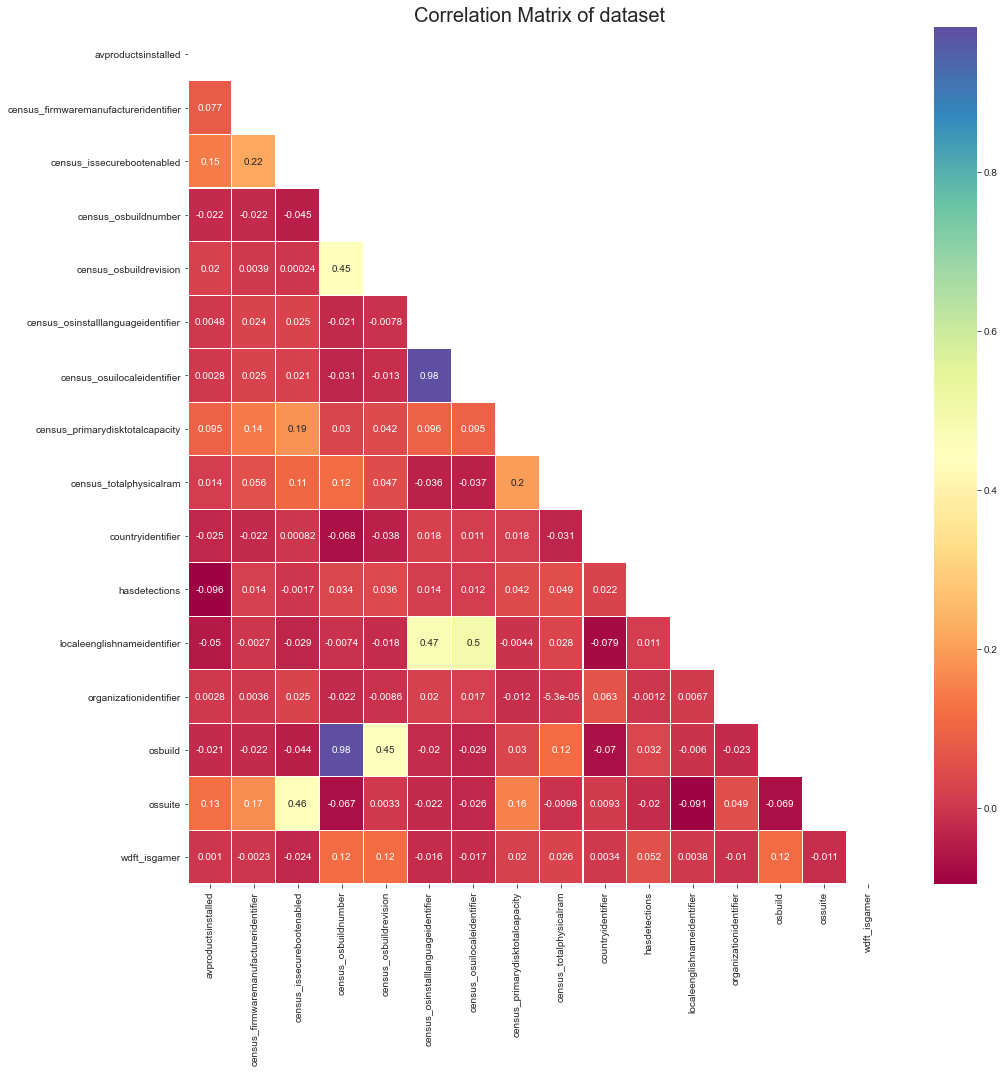

In [32]:
train_corr_df = train[train.columns.sort_values()]

fig , ax = plt.subplots(figsize = (15,15))
train_corr = train_corr_df.corr()
mask = np.zeros_like(train_corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data = train_corr, mask = mask, linewidth = 0.1, cmap = "Spectral", annot = True)
ax.set_title("Correlation Matrix of dataset", fontsize = 20)
plt.tight_layout();

From the above correlation matrix heatmap, we can spot some collinear features like (highlighted in dark purple in the matrix above):
- `osbuild` and `census_osbuildnumber`
- `census_osuilocaleidentifier` and `census_osinstalllanguageidentifier`

These features would have to be dealt after looking at more EDA below.

In [33]:
# to sort the features that has the highest correlation with the dependent variable
train_corr_sorted = pd.DataFrame(train_corr['hasdetections'].sort_values(ascending = False))
train_corr_sorted

,hasdetections
hasdetections,1.000000
wdft_isgamer,0.051721
census_totalphysicalram,0.049185
census_primarydisktotalcapacity,0.041547
census_osbuildrevision,0.036225
census_osbuildnumber,0.034260
osbuild,0.032377
countryidentifier,0.022242
census_firmwaremanufactureridentifier,0.014136
census_osinstalllanguageidentifier,0.013509


From the above dataframe, it can be seen that there are are no features that are strongly correlated to the dependent variable that can be observed. This could be because we are dealing with a binary classification task and the Pearson coefficient is build for continuous data. 

## Nominal Features

In the dataset, the features in the dataset comes in many different data types however, with analysis of the features during the data cleaning, it can be identified that all of the features are categorical and not numerical.

In [34]:
# define a list of columns names for the subplots
categorical_columns = train.columns.tolist()
categorical_columns.remove('machineidentifier')
categorical_columns

['engineversion',
 'appversion',
 'avproductsinstalled',
 'countryidentifier',
 'organizationidentifier',
 'localeenglishnameidentifier',
 'osbuild',
 'ossuite',
 'osplatformsubrelease',
 'osbuildlab',
 'skuedition',
 'smartscreen',
 'census_mdc2formfactor',
 'census_primarydisktotalcapacity',
 'census_primarydisktypename',
 'census_totalphysicalram',
 'census_chassistypename',
 'census_osversion',
 'census_osbranch',
 'census_osbuildnumber',
 'census_osbuildrevision',
 'census_osedition',
 'census_osskuname',
 'census_osinstalltypename',
 'census_osinstalllanguageidentifier',
 'census_osuilocaleidentifier',
 'census_oswuautoupdateoptionsname',
 'census_activationchannel',
 'census_firmwaremanufactureridentifier',
 'census_issecurebootenabled',
 'wdft_isgamer',
 'hasdetections']

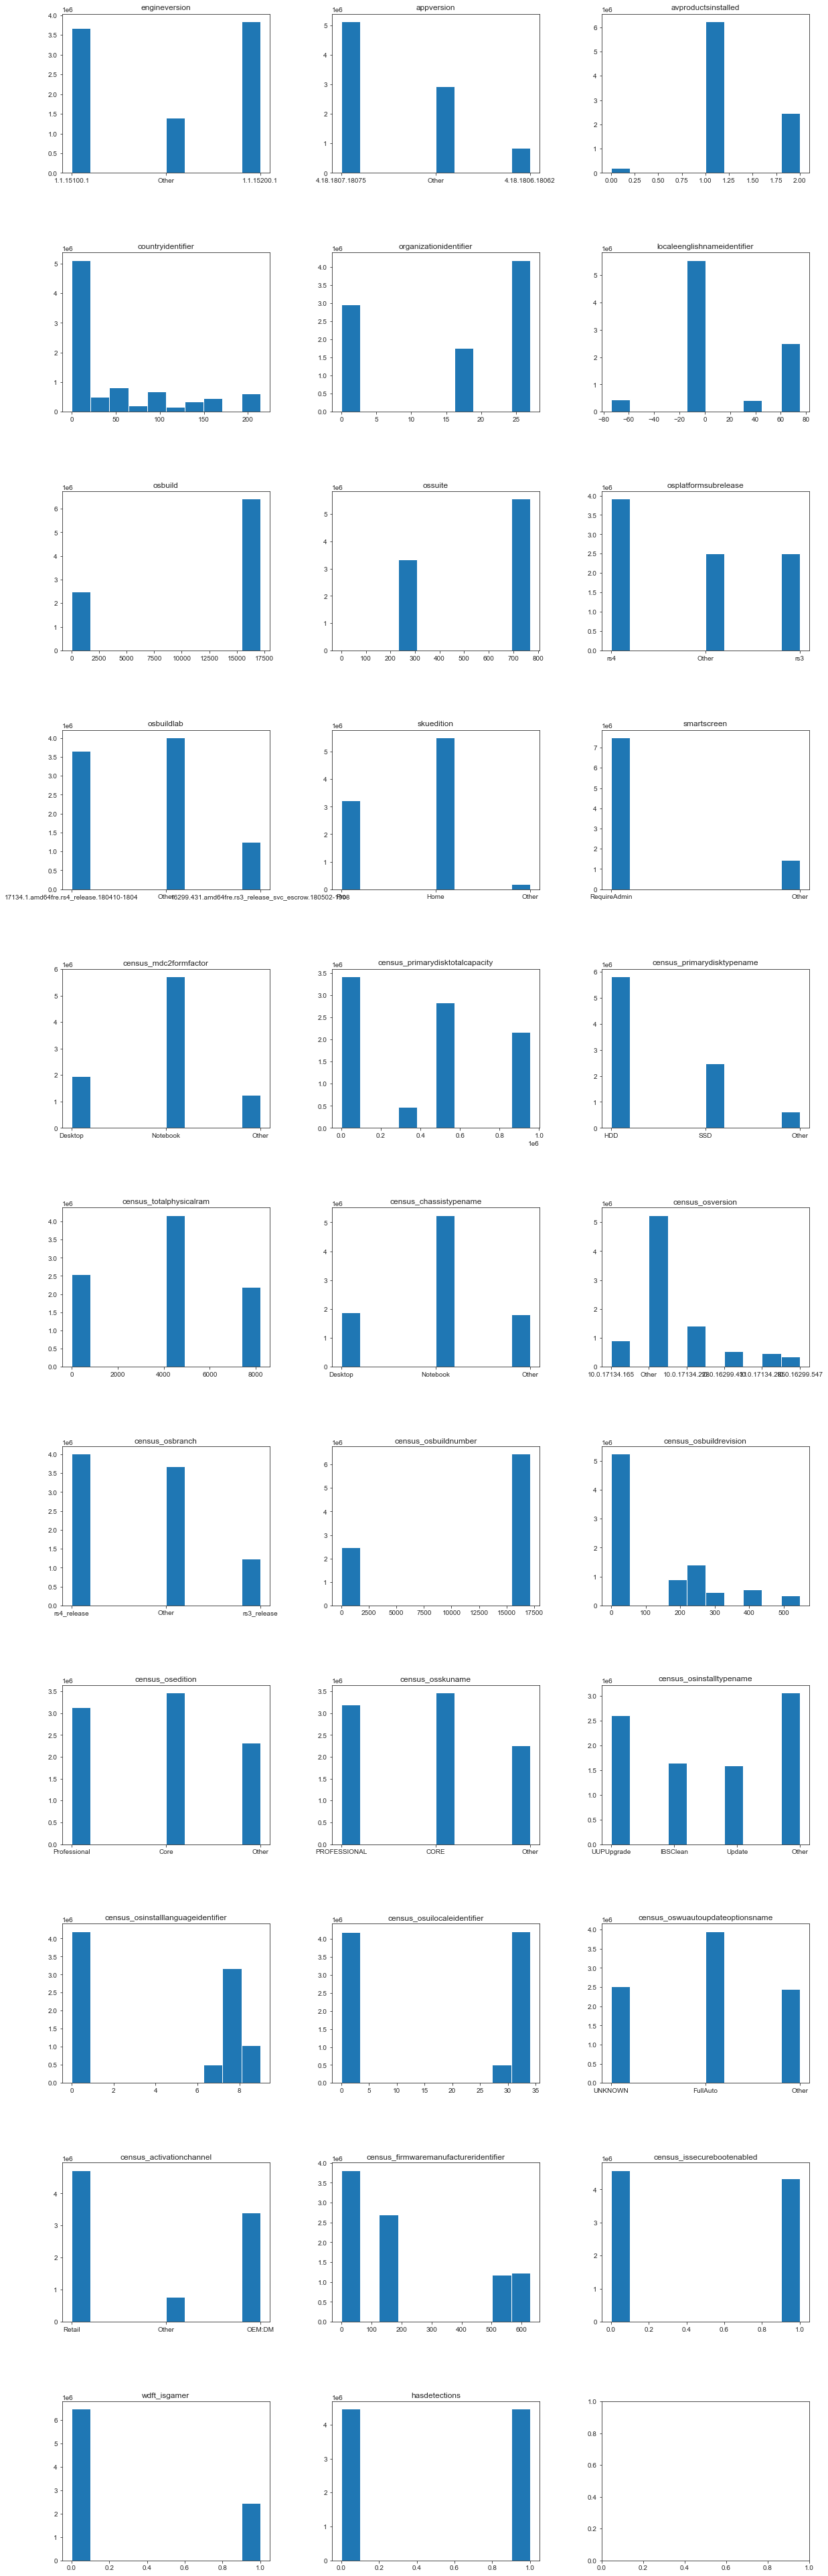

In [35]:
#plot histograms of the features 
subplot_histograms(train, categorical_columns, categorical_columns)

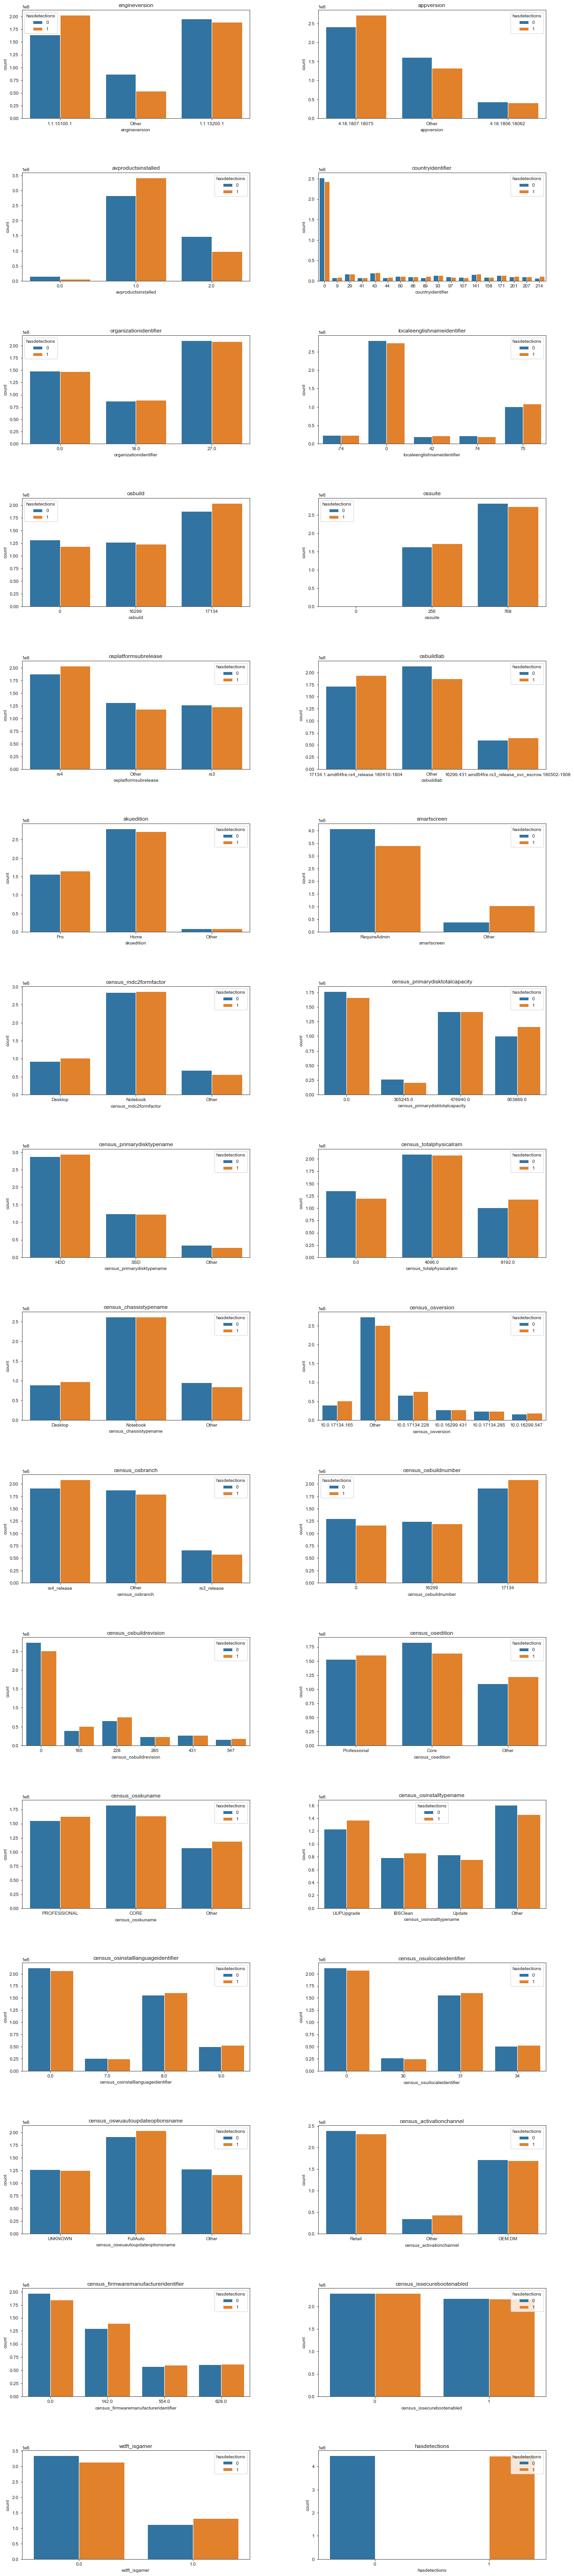

In [36]:
# plot a countplot of the categorical features with respect to the dependent variable
subplot_countplot(train, categorical_columns, categorical_columns)

Upon review of the histograms, the collinear features identified in the correlation matrix previously:

- `osbuild` and `census_osbuildnumber`
- `census_osuilocaleidentifier` and `census_osinstalllanguageidentifier`

The feature `census_osbuildnumber` shall be dropped as their distribution are similar to the `osbuild` feature thus, we shall only keep the `osbuild` feature.

As for `census_osuilocaleidentifier` and `census_osinstalllanguageidentifier`, `census_osuilocaleidentifier` shall be kept and `census_osinstalllanguageidentifier` shall be dropped as the locale identifier feature should be more useful compare to the installation language identifier. 

## Dropping of additional features after EDA


In [37]:
train.drop(columns = ['census_osbuildnumber', 'census_osinstalllanguageidentifier'], inplace = True)
test.drop(columns = ['census_osbuildnumber', 'census_osinstalllanguageidentifier'], inplace = True)

In [38]:
# to confirm the columns have been dropped
print(train.shape)
print(test.shape)

(8921483, 31)
(7853253, 30)


# Export Data
***
With the data cleaning, feature selection and EDA completed, the cleaned datasets will be exported before proceeding to the next notebook for pre-porcessing, model preperation and modelling.


In [39]:
train.to_csv('../data/train_cleaned.csv', index = False)

In [40]:
test.to_csv('../data/test_cleaned.csv', index = False)